# Pooling 이란?
## Convolution Layer에서 행렬 연산을 하고 각 픽셀중 하나의 값을 뽑아내는 과정
### - Overfitting을 방지하기 위해 사용.

-------------
## Max pooling

#### 커널 사이즈 내에 있는 픽셀중 가장 큰 픽셀만 추출

In [2]:
import torch
from torch import nn 
import torch.nn.functional as F

from matplotlib import pyplot as plt
import numpy as np
import torchvision

# 이미지 확인을 위한 함수

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

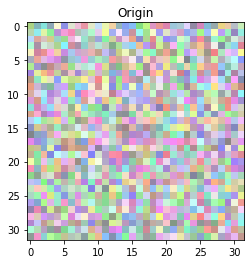

torch.Size([3, 32, 32]) tensor(0.5012)


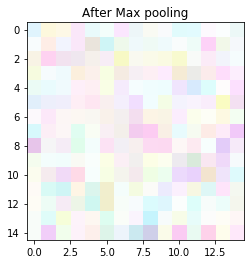

torch.Size([3, 15, 15]) tensor(0.9047)


In [3]:
x = torch.rand(3,32,32)
plt.title('Origin')
imshow(x)
print(x.shape,x.mean())

m = nn.MaxPool2d(3, stride=2)
y = m(x)
plt.title('After Max pooling')
imshow(y)
print(y.shape,y.mean())

## Avg pooling

#### 커널 사이즈 내에 있는 픽셀의 평균값을 가져온다

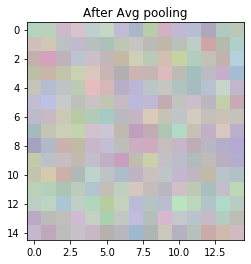

torch.Size([3, 15, 15]) tensor(0.5028)


In [4]:
y2 = F.avg_pool2d(x,3,stride=2)
plt.title('After Avg pooling')
imshow(y2)
print(y2.shape,y2.mean())

# Padding 이란?

## 이미지 테두리 외부에 픽셀을 추가해주는 작업

### - Convolution 후 이미지 크기를 유지하기 위해 사용.
### - 테두리쪽 픽셀 정보를 더 잘 활용하기 위해 사용.

----------------------
##### torch.nn.ConstantPad2d 
#####     - 상수로 패딩한다.

##### torch.nn.ReflectionPad2d 
#####     - 픽셀 값을 대칭되도록 패딩한다.

##### torch.nn.ReplicationPad2d 
#####    - 경계 픽셀 값을 복사해서 패딩한다.

##### torch.nn.ZeroPad2d
#####    - 0으로 패딩한다.

##### 패딩 선언

In [98]:
con_pad = nn.ConstantPad2d(2,1.0)
ref_pad = nn.ReflectionPad2d((2,2,2,2))
rep_pad = nn.ReplicationPad2d((2,2,2,2))
zero_pad = nn.ZeroPad2d(2)

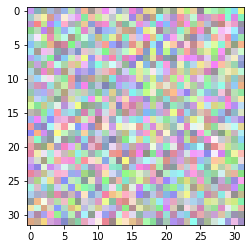

In [99]:
inputs = torch.rand(3,32,32)
imshow(inputs)

##### inputs에 패딩 적용

In [102]:
con_p = con_pad(inputs)
ref_p = ref_pad(inputs.unsqueeze(0))
rep_p = rep_pad(inputs.unsqueeze(0))
zero_p = zero_pad(inputs)

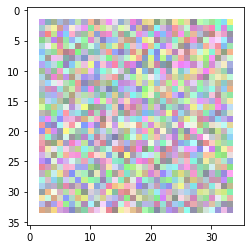

torch.Size([3, 36, 36])


In [103]:
imshow(con_p)
print(con_p.shape)

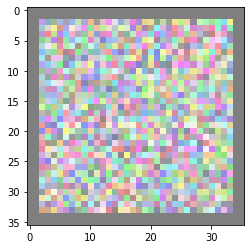

In [104]:
imshow(zero_p)

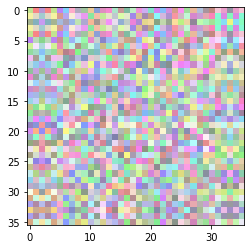

torch.Size([1, 3, 36, 36])


In [107]:
imshow(ref_p.squeeze(0))
print(ref_p.shape)

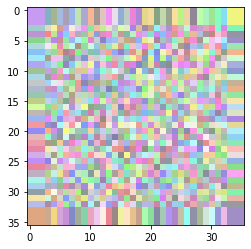

torch.Size([1, 3, 36, 36])


In [108]:
imshow(rep_p.squeeze(0))
print(rep_p.shape)